# Penjelasan Dataset
Dataset ini terdiri dari data performa ETF dan reksa dana yang beroperasi di Eropa.

# Import Dataset & Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/fauzanrrizky/datsci-datasets/main/EIM_Train.csv'
df = pd.read_csv(url)

# Data Understanding

## Jumlah Baris dan Kolom

In [ ]:
total_rows, total_attributes = df.shape
print()
print('Jumlah data: ', total_rows)
print('Jumlah attribut: ', total_attributes)


Jumlah data:  22420
Jumlah attribut:  117


## Deskripsi Dataset

In [ ]:
df.describe()

,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,long_term_projected_earnings_growth,historical_earnings_growth,sales_growth,cash_flow_growth,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
count,22420.000000,22414.000000,22416.000000,22412.000000,22365.000000,22420.000000,22420.000000,22414.000000,22360.000000,22270.000000,...,19567.000000,19111.000000,18731.000000,18227.000000,17822.000000,17369.000000,16875.000000,22420.000000,22420.000000,22420.000000
mean,248.644322,19.336289,2.205785,1.785284,9.436724,3.111079,10.142689,5.847373,4.356577,7.687757,...,9.153154,6.365090,2.739434,6.154814,-6.397013,-4.092733,7.171196,14.380955,6.702810,3.207895
std,73.347405,13.014684,1.365051,1.313544,5.064422,1.698060,3.919015,23.604589,6.794555,8.203724,...,3.721185,5.723606,6.178233,3.947787,5.856910,3.229732,4.700540,3.152836,2.045632,1.074212
min,-125.830000,4.800000,0.140000,0.140000,0.720000,0.000000,0.820000,-82.910000,-96.200000,-90.530000,...,-9.150000,-15.180000,-22.550000,-24.000000,-37.310000,-20.600000,-17.610000,0.000000,0.000000,1.000000
25%,213.190000,14.700000,1.370000,1.000000,6.110000,1.970000,8.090000,-0.850000,2.230000,4.260000,...,6.650000,2.900000,-0.530000,3.560000,-9.040000,-5.960000,5.115000,13.000000,5.000000,3.000000
50%,259.800000,17.870000,1.850000,1.430000,8.420000,2.820000,9.430000,4.010000,4.460000,7.120000,...,8.770000,6.600000,1.890000,6.030000,-5.380000,-4.410000,7.110000,15.000000,7.000000,3.000000
75%,295.320000,21.600000,2.640000,2.160000,11.690000,3.920000,11.190000,9.067500,7.160000,10.087500,...,11.480000,9.080000,5.110000,8.840000,-2.760000,-2.340000,9.680000,17.000000,8.000000,4.000000
max,508.570000,362.320000,16.690000,17.470000,59.420000,17.210000,76.000000,632.610000,60.040000,260.270000,...,31.540000,64.290000,80.440000,29.030000,32.980000,16.640000,29.230000,20.000000,15.000000,5.000000


In [ ]:
df.describe(include=['object'])

,ticker,category,dividend_frequency,equity_style,equity_size,bond_interest_rate_sensitivity,bond_credit_quality,nav_per_share_currency,shareclass_size_currency,fund_size_currency
count,22420,22420,10435,22420,22420,2287,2287,22410,22002,22063
unique,22420,196,4,3,3,3,3,17,15,13
top,0P000153IG,Global Emerging Markets Equity,Annually,Blend,Large,High,Low,EUR,USD,USD
freq,1,1422,7856,11010,17767,994,1270,6901,7976,9517


In [ ]:
type_counts = df.dtypes.value_counts()
print(type_counts)

float64    105
object      10
int64        2
Name: count, dtype: int64


## Data Duplikat

In [ ]:
print("Jumlah duplikasi data: " + str(df.duplicated().sum))

Jumlah duplikasi data: <bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
22415    False
22416    False
22417    False
22418    False
22419    False
Length: 22420, dtype: bool>


Tidak ada data duplikat

## Missing Value

In [ ]:
import pandas as pd

def get_missing_info(df, top_n=60):

    missing_values = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    missing_info = pd.DataFrame({
        'Column': missing_values.index,
        'Missing Values': missing_values.values,
        'Missing Values Percentage': missing_percentage.values
    })

    missing_info = missing_info.sort_values(by='Missing Values Percentage', ascending=False)
    missing_info = missing_info.head(top_n)

    return missing_info

In [ ]:
result_missing_info = get_missing_info(df)
print(result_missing_info)

                             Column  Missing Values  Missing Values Percentage
23                modified_duration           20692                  92.292596
24               effective_maturity           20529                  91.565566
20              bond_credit_quality           20133                  89.799286
19   bond_interest_rate_sensitivity           20133                  89.799286
52                 credit_not_rated           19897                  88.746655
51                   credit_below_b           19897                  88.746655
45                       credit_aaa           19897                  88.746655
46                        credit_aa           19897                  88.746655
47                         credit_a           19897                  88.746655
48                       credit_bbb           19897                  88.746655
49                        credit_bb           19897                  88.746655
50                         credit_b           19897 

## Check Outliers pada Kolom Numerikal

In [ ]:
numeric_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(exclude=['number'])
numeric_cols.shape

(22420, 107)

In [ ]:
# Variabel untuk outliers
Q3 = numeric_cols.quantile(0.75)
Q1 = numeric_cols.quantile(0.25)
IQR = Q3.subtract(Q1)

In [ ]:
Jumlah_Outlier0 = []
pd.set_option('display.max_columns', None)
for col in df.select_dtypes(np.number).columns:
    outliers = ((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier0.append([col, outliers, outliers/len(df)])

indexOutput0 = list(range(0, len(Jumlah_Outlier0)))

pd.DataFrame(Jumlah_Outlier0, columns=['Column', 'Outlier','persentase'],index=indexOutput0).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,asset_bond,5384,0.240143
1,asset_stock,4672,0.208385
2,involvement_palm_oil,4436,0.197859
3,asset_other,3848,0.171632
4,involvement_gmo,3572,0.159322
...,...,...,...
102,modified_duration,28,0.001249
103,management_fees,20,0.000892
104,credit_bbb,15,0.000669
105,sustainability_percentage_rank,0,0.000000


# Data Exploration & Visualization

- **Nomor 1.** 5 besar Investment Management berdasarkan dana kelolaan (fund_size)
- **Nomor 2.** Perbandingan untuk tiap sektor (sector_*)
- **Nomor 3.** Hubungan antara management_fees dengan pertumbuhan return investasi
- **Nomor 4.** Identifikasi Pilihan Sektor Investasi dari Investment Management berdasarkan Ukuran Ekuitas_style

## 1) 5 Besar Investment Management berdasarkan Dana Kelolaan

Saya akan mencari tahu 5 besar investment management berdasarkan dana kelolaannya. Disini, saya menggunakan fitur 'ticker', 'category', 'fund_size', dan 'fund_size_currency'

### Memilih variabel yang sesuai (diperlukan)

In [ ]:
df_1 = df.copy()
kolom_tujuan_1a = ['ticker','category','fund_size','fund_size_currency']
df_1 = df_1[kolom_tujuan_1a]
df_1

,ticker,category,fund_size,fund_size_currency
0,0P000153IG,Global Flex-Cap Equity,6.566210e+09,NOK
1,F00000OUR6,US Mid-Cap Equity,7.717900e+08,USD
2,F00000OTTT,Asia-Pacific ex-Japan Equity,1.282800e+08,GBP
3,F000005K32,US Large-Cap Blend Equity,2.974600e+08,USD
4,F00000ZCZC,Europe Mid-Cap Equity,1.880000e+07,EUR
...,...,...,...,...
22415,F0GBR04RWD,Europe ex-UK Small/Mid-Cap Equity,1.894400e+08,GBP
22416,F000002K4M,UK Equity Income,5.716000e+07,GBP
22417,F00000PGHH,Global Large-Cap Blend Equity,7.452200e+08,USD
22418,F00000QNV0,UK Small-Cap Equity,1.921700e+08,GBP


### Imputasi Data

In [ ]:
# Check missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(df_1)

                    Total   Percent
fund_size             357  1.592328
fund_size_currency    357  1.592328


Kami akan melakukan drop terhadap missing value. Kami tidak bisa berasumsi dengan, misal mengambil nilai mode dari currency. Hal ini dapat berbahaya.

Misalnya, jika kita mengisi dengan nilai terbanyak (USD), tapi mata uang yang benar adalah JPY, hal itu akan fatal karena perbedaan kurs yang cukup jauh.

In [ ]:
# Mengisi Missing values dengan nilai 0
df_1.dropna(inplace=True)
cek_null(df_1)

Empty DataFrame
Columns: [Total, Percent]
Index: []


### Mencari nilai unik di setiap kolom

In [ ]:
for kolom in df_1.columns:
    jumlah_nilai_unik = df_1[kolom].nunique()
    print(f'Jumlah nilai unik untuk kolom {kolom}: {jumlah_nilai_unik}')

Jumlah nilai unik untuk kolom ticker: 22063
Jumlah nilai unik untuk kolom category: 191
Jumlah nilai unik untuk kolom fund_size: 7903
Jumlah nilai unik untuk kolom fund_size_currency: 13


### Konversi ke satu mata uang (USD)

In [ ]:
print(df_1['fund_size_currency'].unique())

['NOK' 'USD' 'GBP' 'EUR' 'CHF' 'JPY' 'CAD' 'HKD' 'SEK' 'AUD' 'SGD' 'DKK'
 'CNH']


In [ ]:
# Membuat kolom baru "fund_size_usd" dengan mengonversi ke USD (Data 1 November 2023)
# Nilai tukar ke usd
exchange_rates = {
    'NOK': 0.089,
    'USD': 1.0,
    'GBP': 1.21,
    'EUR': 1.06,
    'CHF': 1.11,
    'JPY': 0.0067,
    'CAD': 0.72,
    'HKD': 0.13,
    'SEK': 0.089,
    'AUD': 0.63,
    'SGD': 0.73,
    'DKK': 0.14,
    'CNH': 0.14
}

df_1.loc[df_1.index, 'fund_size_usd'] = df_1.apply(lambda row: row['fund_size'] * exchange_rates[row['fund_size_currency']], axis=1)

df_1



,ticker,category,fund_size,fund_size_currency,fund_size_usd
0,0P000153IG,Global Flex-Cap Equity,6.566210e+09,NOK,584392690.0
1,F00000OUR6,US Mid-Cap Equity,7.717900e+08,USD,771790000.0
2,F00000OTTT,Asia-Pacific ex-Japan Equity,1.282800e+08,GBP,155218800.0
3,F000005K32,US Large-Cap Blend Equity,2.974600e+08,USD,297460000.0
4,F00000ZCZC,Europe Mid-Cap Equity,1.880000e+07,EUR,19928000.0
...,...,...,...,...,...
22415,F0GBR04RWD,Europe ex-UK Small/Mid-Cap Equity,1.894400e+08,GBP,229222400.0
22416,F000002K4M,UK Equity Income,5.716000e+07,GBP,69163600.0
22417,F00000PGHH,Global Large-Cap Blend Equity,7.452200e+08,USD,745220000.0
22418,F00000QNV0,UK Small-Cap Equity,1.921700e+08,GBP,232525700.0


### Mengurutkan Investment Management berdasarkan 'fund_size_usd'

In [ ]:
from prettytable import PrettyTable

df_1_sorted = df_1.sort_values(by="fund_size_usd", ascending=False)
df_1_sorted = df_1_sorted[['ticker', 'category', 'fund_size_usd']]
df_1_sorted_top5 = df_1_sorted.head(5)
df_1_sorted_top50 = df_1_sorted.head(50)

def convertToPrettyTable(df_1_sorted,topx):
  # Mengubah format kolom fund_size_usd
  df_1_sorted['fund_size_usd'] = df_1_sorted['fund_size_usd'].apply(lambda x: '${:,.2f}'.format(x))

  # Menambahkan kolom nomor
  df_1_sorted.insert(0, 'No.', range(1, len(df_1_sorted) + 1))

  # Mengubah nama kolom fund_size_usd menjadi Dana Kelolaan (USD)
  df_1_sorted.rename(columns={'fund_size_usd': 'Dana Kelolaan (USD)'}, inplace=True)
  df_1_sorted.rename(columns={'ticker': 'Ticker'}, inplace=True)
  df_1_sorted.rename(columns={'category': 'Kategori'}, inplace=True)

  # Inisialisasi PrettyTable
  table = PrettyTable()

  # Menambahkan kolom ke PrettyTable
  table.field_names = df_1_sorted.columns

  # Menambahkan baris ke PrettyTable
  for index, row in df_1_sorted.iterrows():
      table.add_row(row)

  # Menampilkan tabel
  print(f"{topx} Besar Investment Management Berdasarkan Dana Kelolaan")
  print(table)


convertToPrettyTable(df_1_sorted_top5,5)
print("")
convertToPrettyTable(df_1_sorted_top50,50)

5 Besar Investment Management Berdasarkan Dana Kelolaan
+-----+------------+-----------------------------------+---------------------+
| No. |   Ticker   |              Kategori             | Dana Kelolaan (USD) |
+-----+------------+-----------------------------------+---------------------+
|  1  | F00000VSRW | Global Flexible Bond - EUR Hedged |  $66,869,780,000.00 |
|  2  | F00000OY3Q | Global Flexible Bond - EUR Hedged |  $66,869,780,000.00 |
|  3  | F00000OY3P | Global Flexible Bond - EUR Hedged |  $66,869,780,000.00 |
|  4  | F00000OZZ4 | Global Flexible Bond - USD Hedged |  $66,869,780,000.00 |
|  5  | F00000WHGM | Global Flexible Bond - CHF Hedged |  $66,869,780,000.00 |
+-----+------------+-----------------------------------+---------------------+

50 Besar Investment Management Berdasarkan Dana Kelolaan
+-----+------------+-----------------------------------+---------------------+
| No. |   Ticker   |              Kategori             | Dana Kelolaan (USD) |
+-----+----------

C:\Users\mfauz\AppData\Local\Temp\ipykernel_24432\2289987955.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_sorted['fund_size_usd'] = df_1_sorted['fund_size_usd'].apply(lambda x: '${:,.2f}'.format(x))
C:\Users\mfauz\AppData\Local\Temp\ipykernel_24432\2289987955.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_sorted.rename(columns={'fund_size_usd': 'Dana Kelolaan (USD)'}, inplace=True)
C:\Users\mfauz\AppData\Local\Temp\ipykernel_24432\2289987955.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



### Temuan lain: Mengelompokkan dan Mengurutkan berdasarkan Category

In [ ]:
total_fund_size_usd_groupby_category_df = df_1.groupby('category')['fund_size_usd'].sum().reset_index()

total_fund_size_usd_groupby_category_df = total_fund_size_usd_groupby_category_df.sort_values(by='fund_size_usd', ascending=False)
df_top5_fund_size = total_fund_size_usd_groupby_category_df.head(5)

print('5 Besar Investment Management Berdasarkan Dana Kelolaan')
df_top5_fund_size

5 Besar Investment Management Berdasarkan Dana Kelolaan


,category,fund_size_usd
179,US Large-Cap Blend Equity,1.962034e+12
87,Global Emerging Markets Equity,1.945899e+12
101,Global Large-Cap Blend Equity,1.785878e+12
102,Global Large-Cap Growth Equity,1.707019e+12
189,USD Moderate Allocation,1.046020e+12


Visualisasi Data (Matplotlib)

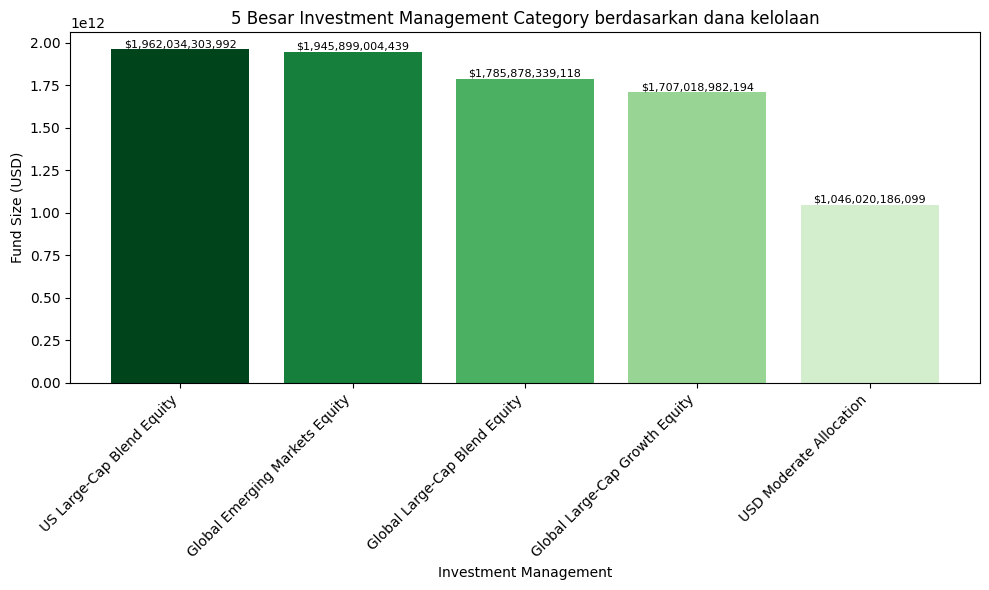

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk visualisasi
investment_managers = df_top5_fund_size['category']
fund_sizes = df_top5_fund_size['fund_size_usd']

# Mengatur colormap dari biru tua ke muda
colors = plt.cm.Greens(np.linspace(1, 0.2, len(investment_managers)))

# Membuat bar chart dengan warna yang telah diatur
plt.figure(figsize=(10, 6))
bars = plt.bar(investment_managers, fund_sizes, color=colors)
plt.xlabel('Investment Management')
plt.ylabel('Fund Size (USD)')
plt.title('5 Besar Investment Management Category berdasarkan dana kelolaan')
plt.xticks(rotation=45, ha='right')  # Rotasi label agar lebih mudah dibaca

# Menampilkan nilai fund size di atas bar dengan format yang diinginkan
for bar, v in zip(bars, fund_sizes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50, f'${v:,.0f}', ha='center', va='bottom', fontsize=8)

# Menampilkan grafik
plt.tight_layout()
plt.show()

## 2) Perbandingan Setiap Sektor

Untuk membandingkan setiap sektor, digunakan fitur 'sector_*'

In [ ]:
df_b = df.copy()

In [ ]:
# Fungsi untuk mengkonversi fund size ke currency USD
def convert_to_usd(row):
  currency = row['fund_size_currency']
  size = row['fund_size']
  rate = exchange_rates.get(currency, 1.0)
  return size * rate

In [ ]:
df_b['fund_size_usd'] = df_b.apply(convert_to_usd, axis=1)
df_b[['fund_size_currency', 'fund_size', 'fund_size_usd']]

,fund_size_currency,fund_size,fund_size_usd
0,NOK,6.566210e+09,584392690.0
1,USD,7.717900e+08,771790000.0
2,GBP,1.282800e+08,155218800.0
3,USD,2.974600e+08,297460000.0
4,EUR,1.880000e+07,19928000.0
...,...,...,...
22415,GBP,1.894400e+08,229222400.0
22416,GBP,5.716000e+07,69163600.0
22417,USD,7.452200e+08,745220000.0
22418,GBP,1.921700e+08,232525700.0


In [ ]:
sector_related_columns = [col for col in df.columns if 'sector' in col.lower()]
sector_related_columns

['sector_basic_materials',
 'sector_consumer_cyclical',
 'sector_financial_services',
 'sector_real_estate',
 'sector_consumer_defensive',
 'sector_healthcare',
 'sector_utilities',
 'sector_communication_services',
 'sector_energy',
 'sector_industrials',
 'sector_technology']

In [ ]:
sector_analysis = pd.DataFrame(index=sector_related_columns, columns=['Total Fund Size (USD)', 'Average Fund Size (USD)', 'Number of Funds'])
sector_analysis

,Total Fund Size (USD),Average Fund Size (USD),Number of Funds
sector_basic_materials,NaN,NaN,NaN
sector_consumer_cyclical,NaN,NaN,NaN
sector_financial_services,NaN,NaN,NaN
sector_real_estate,NaN,NaN,NaN
sector_consumer_defensive,NaN,NaN,NaN
sector_healthcare,NaN,NaN,NaN
sector_utilities,NaN,NaN,NaN
sector_communication_services,NaN,NaN,NaN
sector_energy,NaN,NaN,NaN
sector_industrials,NaN,NaN,NaN


In [ ]:
for sector in sector_related_columns:
  sector_data = df_b[df_b[sector] > 0]

  sector_analysis.loc[sector, 'Total Fund Size (USD)'] = sector_data['fund_size_usd'].sum()
  sector_analysis.loc[sector, 'Average Fund Size (USD)'] = sector_data['fund_size_usd'].mean()
  sector_analysis.loc[sector, 'Number of Funds'] = sector_data.shape[0]

sector_analysis.reset_index(inplace=True)
sector_analysis.rename(columns={'index': 'Sector'}, inplace=True)
sector_analysis

,Sector,Total Fund Size (USD),Average Fund Size (USD),Number of Funds
0,sector_basic_materials,19463669542775.117188,1018773595.539132,19397
1,sector_consumer_cyclical,22878488618413.292969,1118752499.677912,20788
2,sector_financial_services,22408782718649.617188,1123022086.731964,20299
3,sector_real_estate,18478727882200.457031,1110834258.02227,16907
4,sector_consumer_defensive,20515175228604.226562,1044880066.649905,19957
5,sector_healthcare,20990785265262.765625,1077168638.849631,19820
6,sector_utilities,17879234277128.007812,1128739537.697475,16104
7,sector_communication_services,22373365771967.636719,1130938976.493335,20132
8,sector_energy,17695690591143.148438,1081974355.924375,16630
9,sector_industrials,21174911148003.144531,1042123684.630304,20659


In [ ]:
sector_analysis['Total Fund Size (USD)'] = sector_analysis['Total Fund Size (USD)'].astype(float)
sector_analysis['Average Fund Size (USD)'] = sector_analysis['Average Fund Size (USD)'].astype(float)
sector_analysis['Number of Funds'] = sector_analysis['Number of Funds'].astype(int)
sector_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sector                   11 non-null     object 
 1   Total Fund Size (USD)    11 non-null     float64
 2   Average Fund Size (USD)  11 non-null     float64
 3   Number of Funds          11 non-null     int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 440.0+ bytes


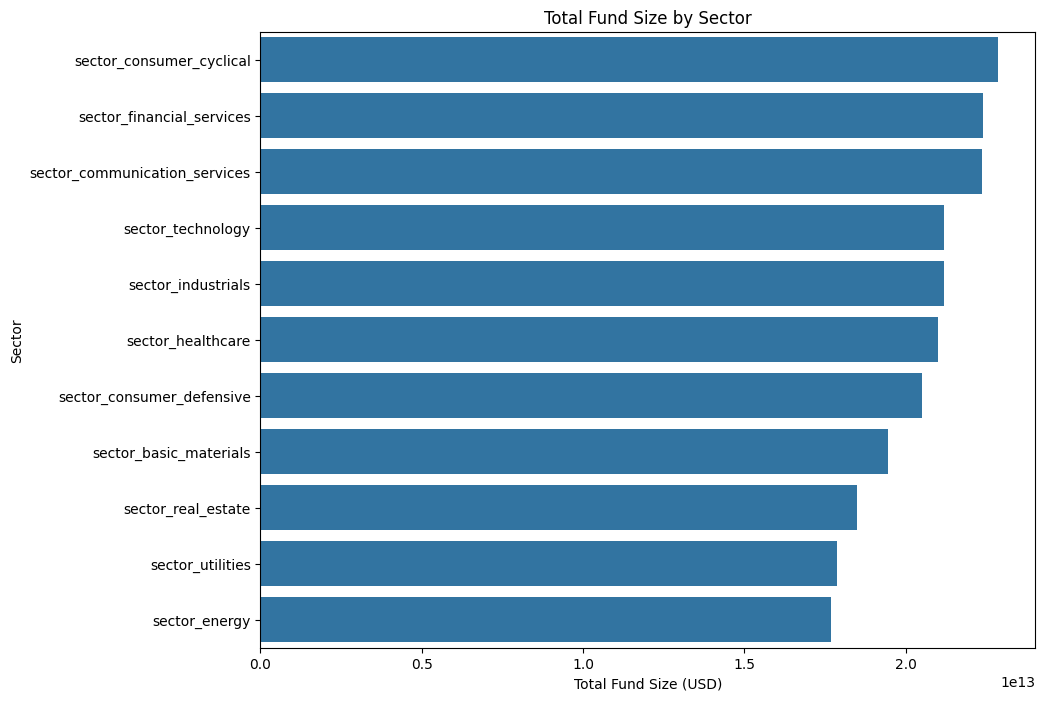

In [ ]:
# Plotting untuk total fund size berdasarkan sector
plt.figure(figsize=(10,8))
sns.barplot(x='Total Fund Size (USD)', y='Sector', data=sector_analysis.sort_values('Total Fund Size (USD)', ascending=False))
plt.title('Total Fund Size by Sector')
plt.xlabel('Total Fund Size (USD)')
plt.ylabel('Sector')
plt.show()

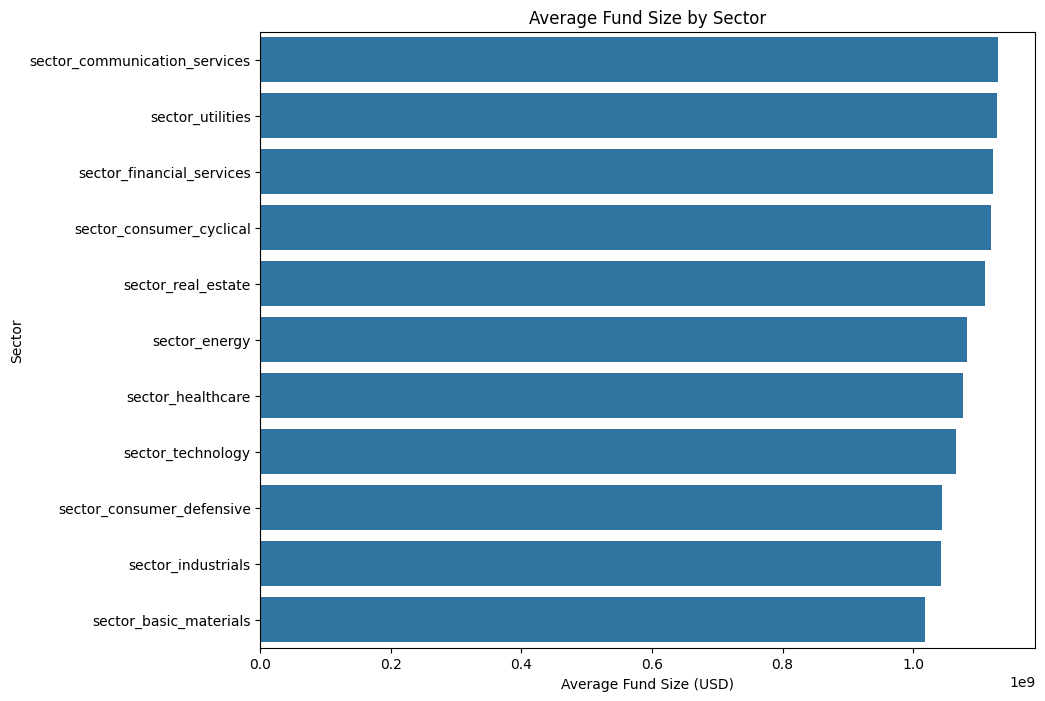

In [ ]:
# Plotting untuk total average fund size berdasarkan sector
plt.figure(figsize=(10,8))
sns.barplot(x='Average Fund Size (USD)', y='Sector', data=sector_analysis.sort_values('Average Fund Size (USD)', ascending=False))
plt.title('Average Fund Size by Sector')
plt.xlabel('Average Fund Size (USD)')
plt.ylabel('Sector')
plt.show()

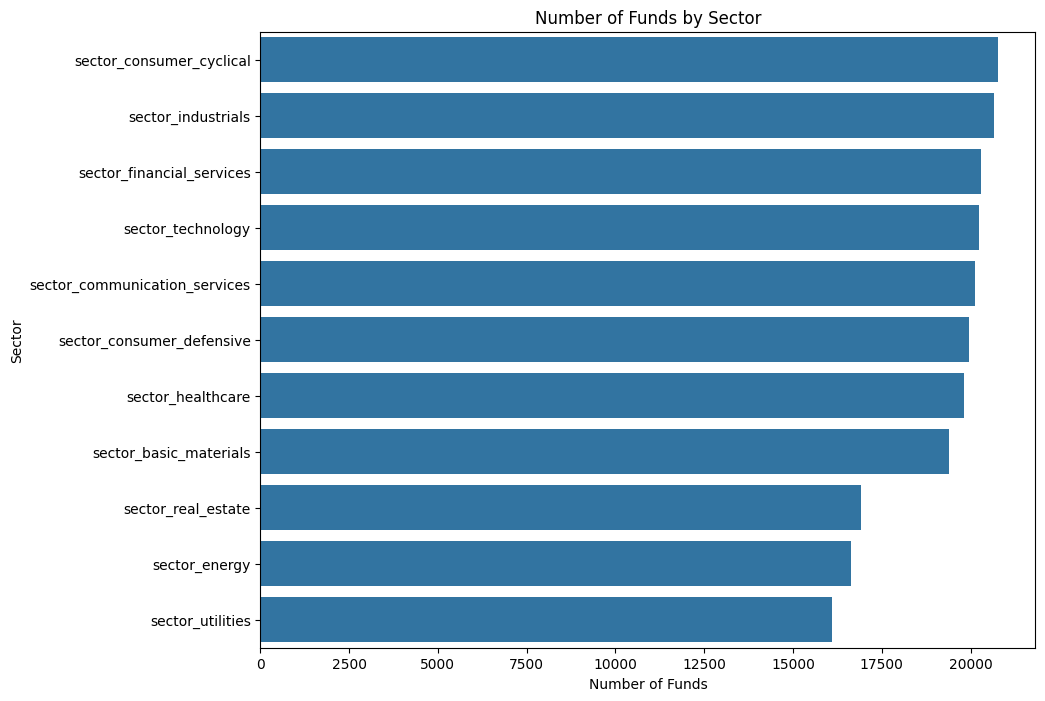

In [ ]:
# Plotting untuk total number of funds berdasarkan sector
plt.figure(figsize=(10,8))
sns.barplot(x='Number of Funds', y='Sector', data=sector_analysis.sort_values('Number of Funds', ascending=False))
plt.title('Number of Funds by Sector')
plt.xlabel('Number of Funds')
plt.ylabel('Sector')
plt.show()


In [ ]:
total_investment = sector_analysis['Total Fund Size (USD)'].sum()
sector_analysis['Investment Proportion (%)'] = (sector_analysis['Total Fund Size (USD)']/ total_investment) * 100

sector_analysis_sorted = sector_analysis.sort_values('Investment Proportion (%)', ascending=False)
sector_analysis_sorted[['Sector', 'Investment Proportion (%)']]

,Sector,Investment Proportion (%)
1,sector_consumer_cyclical,10.165619
2,sector_financial_services,9.956915
7,sector_communication_services,9.941178
10,sector_technology,9.419222
9,sector_industrials,9.408667
5,sector_healthcare,9.326854
4,sector_consumer_defensive,9.115526
0,sector_basic_materials,8.648310
3,sector_real_estate,8.210670
6,sector_utilities,7.944296


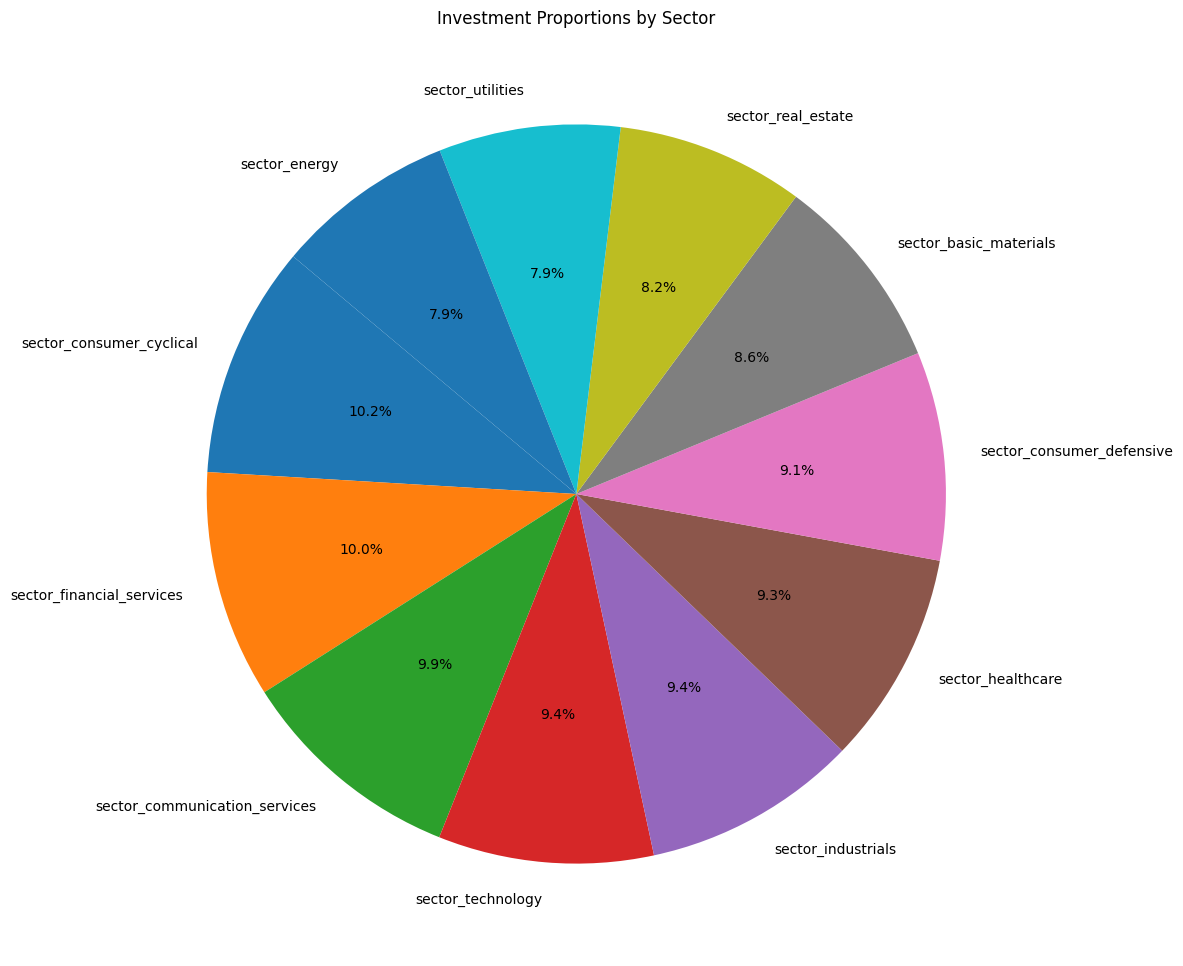

In [ ]:
plt.figure(figsize=(12,12))
plt.pie(sector_analysis_sorted['Investment Proportion (%)'], labels=sector_analysis_sorted['Sector'], autopct='%1.1f%%', startangle=140)
plt.title('Investment Proportions by Sector')
plt.show()

In [ ]:
# df['Asset_bond'].min()
df.columns.tolist()
df[df['asset_stock'] < 0].head()

,ticker,category,dividend_frequency,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,long_term_projected_earnings_growth,historical_earnings_growth,sales_growth,cash_flow_growth,book_value_growth,roa,roe,roic,bond_interest_rate_sensitivity,bond_credit_quality,average_coupon_rate,average_credit_quality,modified_duration,effective_maturity,asset_stock,asset_bond,asset_cash,asset_other,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology,market_cap_giant,market_cap_large,market_cap_medium,market_cap_small,market_cap_micro,credit_aaa,credit_aa,credit_a,credit_bbb,credit_bb,credit_b,credit_below_b,credit_not_rated,holdings_n_stock,holdings_n_bonds,ongoing_cost,management_fees,environmental_score,social_score,governance_score,sustainability_score,sustainability_rank,sustainability_percentage_rank,involvement_abortive_contraceptive,involvement_alcohol,involvement_animal_testing,involvement_controversial_weapons,involvement_gambling,involvement_gmo,involvement_military_contracting,involvement_nuclear,involvement_palm_oil,involvement_pesticides,involvement_small_arms,involvement_thermal_coal,involvement_tobacco,nav_per_share_currency,nav_per_share,shareclass_size_currency,shareclass_size,fund_size_currency,fund_size,fund_trailing_return_ytd,fund_trailing_return_3years,fund_trailing_return_5years,fund_trailing_return_10years,fund_return_2019,fund_return_2018,fund_return_2017,fund_return_2016,fund_return_2015,fund_return_2020_q3,fund_return_2020_q2,fund_return_2020_q1,fund_return_2019_q4,fund_return_2019_q3,fund_return_2019_q2,fund_return_2019_q1,fund_return_2018_q4,fund_return_2018_q3,fund_return_2018_q2,fund_return_2018_q1,fund_return_2017_q4,fund_return_2017_q3,fund_return_2017_q2,fund_return_2017_q1,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
19,F00000MBCV,Global Flexible Bond - USD Hedged,Quarterly,Value,Large,228.06,4.99,0.93,1.03,17.92,2.30,5.89,24.51,-10.69,-57.72,-17.79,2.80,31.37,6.53,NaN,NaN,3.83,NaN,NaN,NaN,-0.94,76.11,17.15,7.69,2.13,11.20,12.86,2.61,7.33,14.07,2.83,11.11,2.32,8.32,25.22,52.45,34.78,12.59,0.18,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,1.35700,0.80000,NaN,NaN,NaN,NaN,NaN,NaN,3.33,0.93,5.69,1.04,0.18,0.01,1.53,1.63,0.0,0.26,0.19,2.16,0.78,USD,1.16,USD,14870000.0,GBP,41150000.0,2.48,3.77,7.07,NaN,6.96,3.46,-3.60,25.35,3.12,-2.71,10.99,-4.35,-6.15,5.93,5.38,2.08,1.59,1.44,5.73,-5.05,0.53,-2.61,-2.10,0.58,2.57,7.52,9.77,3.55,2.28,2.08,-7.28,6.52,16,7,3.0
1189,0P0000NO9D,EUR High Yield Bond,NaN,Blend,Large,281.51,18.16,0.92,1.16,3.17,3.96,16.34,26.82,2.51,7.12,5.44,3.41,9.66,6.82,Low,Low,4.09,15.0,NaN,4.85,-2.35,86.94,9.17,6.24,10.88,13.59,8.34,1.32,11.76,9.68,6.13,4.47,4.13,13.76,15.94,63.87,39.87,-3.74,0.00,0.00,0.00,0.00,0.18,9.20,54.41,28.39,7.58,0.24,NaN,245.0,1.50000,1.20000,NaN,NaN,NaN,NaN,NaN,NaN,2.82,0.00,5.93,0.60,2.86,0.00,0.60,0.00,0.0,0.54,0.00,0.29,0.42,HKD,244.14,EUR,3540000.0,EUR,311050000.0,5.25,1.15,8.27,5.77,4.90,-6.03,11.63,25.87,-5.98,1.67,18.17,-14.35,-2.14,-0.05,6.62,0.59,-4.31,2.35,-1.80,-2.29,1.62,1.69,5.89,2.02,0.48,7.35,5.76,10.33,1.20,0.51,-3.65,-4.06,15,8,3.0
1337,F0GBR05ARB,EUR Cautious Allocation - Global,NaN,Blend,Large,272.35,19.74,1.60,1.08,6.88,3.39,9.97,3.38,1.32,6.04,5.18,4.80,14.79,8.97,Medium,Medium,1.99,9.0,NaN,NaN,-9.71,48.43,59.30,1.98,5.73,11.24,15.36,0.38,8.31,10.05,7.81,6.05,3.53,14.67,16.88,42.98,38.92,16.33,1.55,0.22,18.03,11.95,11.50,53.63,3.53,0.00,0.00,1.36,178.0,102.0,1.68158,1.44367,NaN,NaN,NaN,NaN,NaN,NaN,2.63,0.96,5.90,0.47,0.07,0.01,0.77,1.38,0.0,0.46,0.11,1.40,0.14,EUR,7.92,EUR,655830000.0,EUR,655830000.0,7.87,3.13,6.60,3.48,5.46,-3

## 3) Hubungan antara Biaya Manajemen dengan Pertumbuhan Return Investasi

Bagian ini mencari tahu adakah hubungan antara biaya manajemen dengan pertumbuhan return investasi.

In [ ]:
# Memilih kolom 'management_fees' dan kolom 'fund_return_*'
selected_columns = ['management_fees'] + ['fund_return_2019'] + ['fund_return_2018'] + \
 ['fund_return_2017'] + ['fund_return_2016'] + ['fund_return_2015']

# Membuat dataframe baru dari selected_columns
df_c = df[selected_columns]

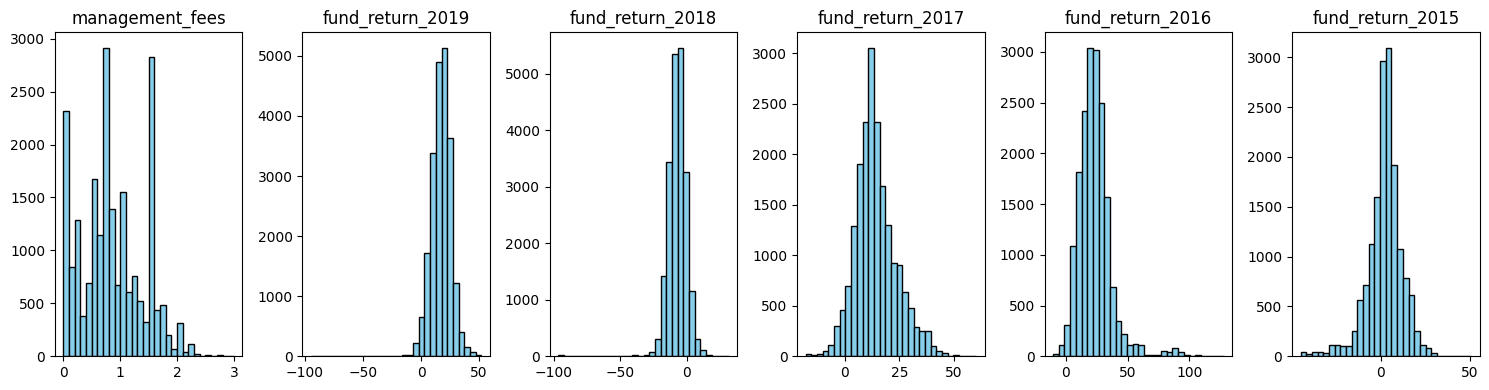

In [ ]:
# Buat subplot untuk setiap kolom
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(15, 4))

# Iterasi melalui setiap kolom dan buat histogram
for i, col in enumerate(selected_columns):
    axes[i].hist(df_c[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Melihat jumlah null dari df_c
null_counts = df_c.isna().sum()
total_rows = len(df_c)
null_percentage = (null_counts / total_rows) * 100

null_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentage
})

print(null_info)

                  Null Count  Null Percentage
management_fees          784         3.496878
fund_return_2019         867         3.867083
fund_return_2018        1427         6.364853
fund_return_2017        2929        13.064228
fund_return_2016        4619        20.602141
fund_return_2015        6604        29.455843


In [ ]:
df_c = df_c.drop(['fund_return_2015'], axis=1)

In [ ]:
# Karena kolom fund_return memiliki banyak missing values, maka dilakukan imputation dengan mean
df_imputed = df_c.fillna(df_c.mean())

In [ ]:
# Menghitung Pearson correlation untuk dataframe, dengan hanya pilih kolom 'management_fees'
correlation_matrix = df_imputed.corr(method='pearson')
correlations_with_management_fees = correlation_matrix['management_fees']

print("Korelasi Fund_Return dengan Management Fee per tahun")
print(correlations_with_management_fees)

Korelasi Fund_Return dengan Management Fee per tahun
management_fees     1.000000
fund_return_2019   -0.093434
fund_return_2018   -0.079737
fund_return_2017    0.026376
fund_return_2016   -0.002582
Name: management_fees, dtype: float64


Berdasarkan korelasi tersebut, **tidak ada korelasi yang kuat** antara Management Fee dan Fund Return per tahun. Nilai korelasi berkisar antara -0.093434 hingga 0.026376, yang menunjukkan bahwa hubungan antara kedua variabel ini lemah dan tidak signifikan.

Dengan kata lain, Fund Return tidak tampak dipengaruhi secara signifikan oleh Management Fee. Ini berarti bahwa investor mungkin tidak perlu terlalu khawatir tentang dampak biaya manajemen terhadap pengembalian investasi mereka.

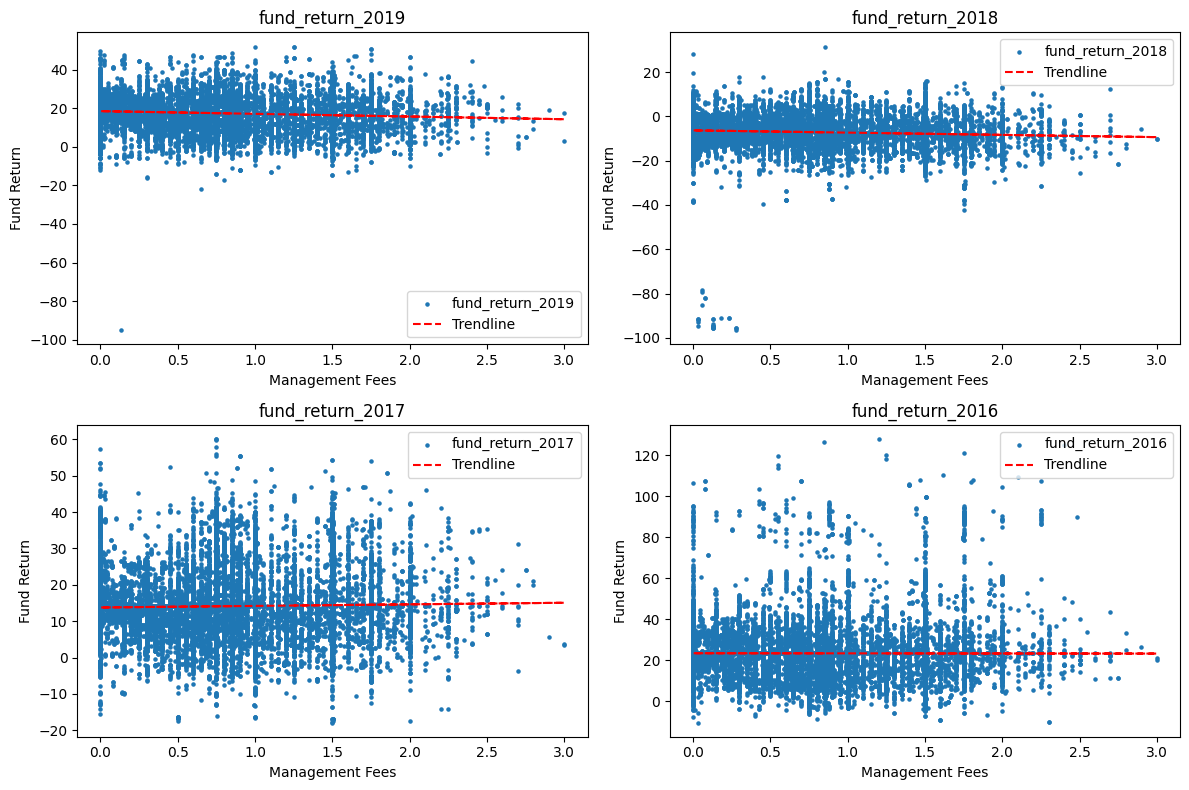

In [ ]:
# Menyeleksi kolom 'management_fees' dan 'fund_return'
x = df_imputed['management_fees']
fund_return_columns = ['fund_return_2019', 'fund_return_2018', 'fund_return_2017', 'fund_return_2016']

# Membuat scatter plots dengan 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
point_size = 5

for i, year_column in enumerate(fund_return_columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Cek jika terdapat empty spot
    if i >= len(fund_return_columns):
        ax.axis('off')  # Mematikan axes untuk empty plots
    else:
        ax.scatter(x, df_imputed[year_column], label=year_column, s=point_size)

        # Menambahkan trendline dan label
        z = np.polyfit(x, df_imputed[year_column], 1)
        p = np.poly1d(z)
        ax.plot(x, p(x), "r--", label="Trendline")
        ax.set_xlabel('Management Fees')
        ax.set_ylabel('Fund Return')
        ax.legend()
        ax.set_title(f'{year_column}')

plt.tight_layout()
plt.show()


Berdasarkan scatter plot yang telah dibuat, distribusi titik-titik pada plot bersifat terdispersi atau tersebar, dan hal ini dapat mengindikasikan bahwa korelasi antara "Management Fees" dan "Fund Return" cenderung rendah. Menunjukkan bahwa **tidak ada hubungan linear** antara `Management Fee` dan `Fund Return`. Ini berarti bahwa perubahan dalam Management Fee tidak secara konsisten diikuti oleh perubahan dalam Fund Return dalam arah tertentu.

Ini menegaskan kesimpulan sebelumnya bahwa Management Fee dan Fund Return tampaknya tidak memiliki korelasi yang signifikan. Oleh karena itu, investor mungkin ingin mempertimbangkan faktor lain selain Management Fee ketika membuat keputusan investasi.

## 4) Pilihan Sektor Investasi dari Investment Management berdasarkan Ukuran Ekuitas

Bagian ini bertujuan untuk mengetahui pilihan sektor investasi dari berbagai investment management berdasarkan beberapa kategori (ukuran ekuitas)

In [ ]:
# Mencari tahu kategori 'equity_size' yang ada

df_4 = df.copy()
kolom_tujuan = "equity_size"
nilai_unik = df_4[kolom_tujuan].unique()
nilai_unik

array(['Large', 'Medium', 'Small'], dtype=object)

Ada tiga kategori investment manajement berdasarkan ukuran ekuitas, Large, Medium, dan Small.

In [ ]:
# Memasukkan variabel yang sesuai
equity_size = 'equity_size'
sectors = ['sector_basic_materials','sector_consumer_cyclical', 'sector_financial_services',
             'sector_real_estate', 'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
             'sector_communication_services', 'sector_energy', 'sector_industrials', 'sector_technology']
df_4 = df_4[sectors+[equity_size]]

Selanjutnya, akan dilakukan imputasi data.

Metode: Mengisi data null (sectors) dengan 0
Alasan: Null disini artinya investment management tidak menginvestasikan uangnya di sektor tersebut.

In [ ]:
# Check missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(df_4)

                               Total    Percent
sector_utilities                6169  27.515611
sector_energy                   5635  25.133809
sector_real_estate              5384  24.014273
sector_basic_materials          2969  13.242640
sector_healthcare               2519  11.235504
sector_consumer_defensive       2425  10.816236
sector_communication_services   2247  10.022302
sector_technology               2121   9.460303
sector_financial_services       2073   9.246209
sector_industrials              1737   7.747547
sector_consumer_cyclical        1613   7.194469


Kolom equity_size tidak mempunyai missing values. Lanjut mengisi missing values dari setiap sectors dengan nilai 0

In [ ]:
# Mengisi Missing values dengan nilai 0
df_4.fillna(0, inplace=True)
cek_null(df_4)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [ ]:
# Fungsi pembuatan donut chart

def create_pie_chart(filtered_df, equity_size_value, ax, suptitle):
    # Menghitung rata-rata proporsi di setiap sektor
    sector_proportion_avg = filtered_df[sectors].mean()

    # Membuat donut chart
    ax.pie(sector_proportion_avg, labels=None, autopct='%1.1f%%', startangle=90,
           wedgeprops=dict(width=0.3), colors=plt.cm.Paired.colors)
    ax.axis('equal')
    if suptitle == True:
      ax.set_title(f'{equity_size_value} Equity Size')

# Menambahkan label untuk color legend
legend_labels = ['Basic Materials', 'Consumer Cyclical', 'Financial Services', 'Real Estate',
                 'Consumer Defensive', 'Healthcare', 'Utilities', 'Communication Services',
                 'Energy', 'Industrials', 'Technology']

### Rata-Rata Proporsi Tiap Sektor di Investment Management dengan Ekuitas Berukuran Kecil

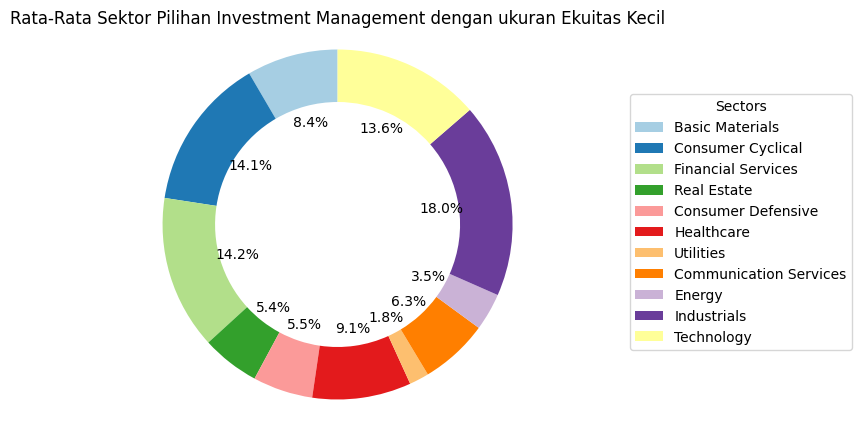

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

# Membuat donut chart untuk Small Equity Size
filtered_df_small = df_4[df_4['equity_size'] == 'Small']
create_pie_chart(filtered_df_small, 'Small', ax, False)

# Menambahkan color legend
fig.legend(labels=legend_labels, title='Sectors', loc='center left', bbox_to_anchor=(0.92, 0.5))

# Menampilkan keseluruhan frame
plt.title('Rata-Rata Sektor Pilihan Investment Management dengan ukuran Ekuitas Kecil')
plt.show()

### Rata-Rata Proporsi Tiap Sektor di Investment Management dengan Ekuitas Berukuran Menengah

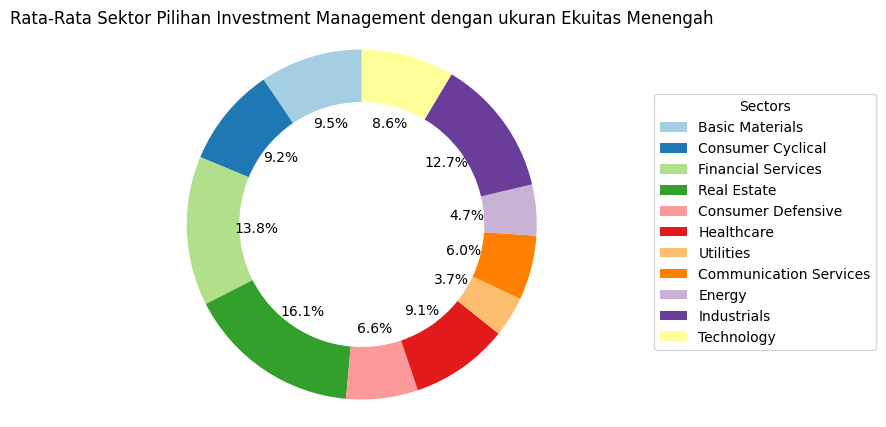

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

# Membuat donut chart untuk Small Equity Size
filtered_df_medium = df_4[df_4['equity_size'] == 'Medium']
create_pie_chart(filtered_df_medium, 'Medium', ax, False)

# Menambahkan color legend
fig.legend(labels=legend_labels, title='Sectors', loc='center left', bbox_to_anchor=(0.92, 0.5))

# Menampilkan keseluruhan frame
plt.title('Rata-Rata Sektor Pilihan Investment Management dengan ukuran Ekuitas Menengah')
plt.show()

### Rata-Rata Proporsi Tiap Sektor di Investment Management dengan Ekuitas Berukuran Besar

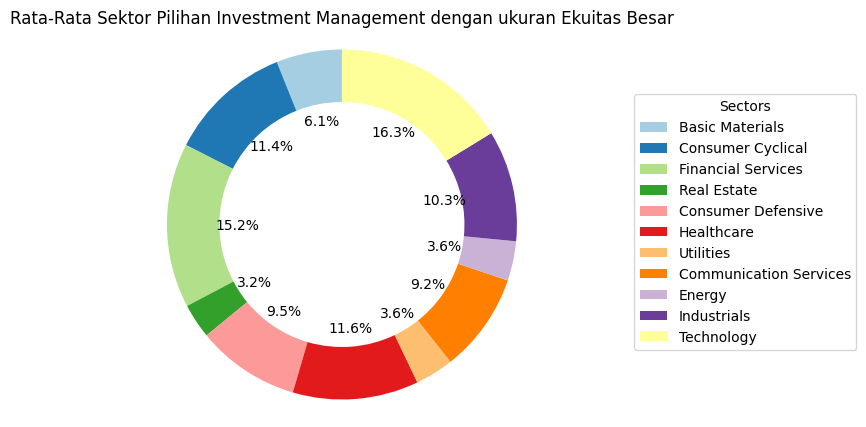

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

# Membuat donut chart untuk Small Equity Size
filtered_df_large = df_4[df_4['equity_size'] == 'Large']
create_pie_chart(filtered_df_large, 'Large', ax, False)

# Menambahkan color legend
fig.legend(labels=legend_labels, title='Sectors', loc='center left', bbox_to_anchor=(0.92, 0.5))

# Menampilkan keseluruhan frame
plt.title('Rata-Rata Sektor Pilihan Investment Management dengan ukuran Ekuitas Besar')
plt.show()

### Perbandingan Setiap Ukuran Ekuitas

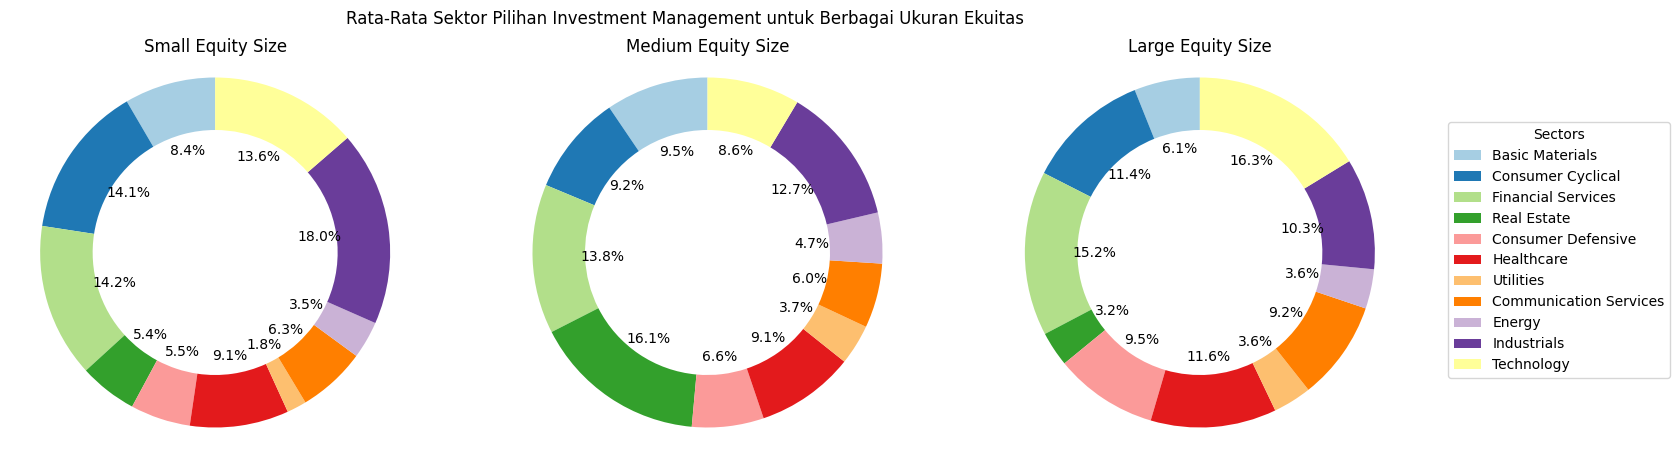

In [ ]:
# Membuat subplots dengan 1 baris dan 3 kolom
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Membuat donut chart untuk Small Equity Size
filtered_df_small = df_4[df_4['equity_size'] == 'Small']
create_pie_chart(filtered_df_small, 'Small', axes[0], True)

# Membuat donut chart untuk Medium Equity Size
filtered_df_medium = df_4[df_4['equity_size'] == 'Medium']
create_pie_chart(filtered_df_medium, 'Medium', axes[1], True)

# Membuat donut chart untuk Large Equity Size
filtered_df_large = df_4[df_4['equity_size'] == 'Large']
create_pie_chart(filtered_df_large, 'Large', axes[2], True)

# Menambahkan color legend
fig.legend(labels=legend_labels, title='Sectors', loc='center left', bbox_to_anchor=(0.92, 0.5))

# Menampilkan keseluruhan frame
plt.suptitle('Rata-Rata Sektor Pilihan Investment Management untuk Berbagai Ukuran Ekuitas')
plt.show()
